In order to conduct the analysis of the dataset, it's best to conduct the data cleaning step when going through the data set. THe data was first imported into Python as a dataframe using ';' as the delimeter

In [2]:
import pandas as pd

# define column names
colnames=['seller','buyer_segment','full_category','category','auction_duration','start_price','total_bids','first_2d_bids','last_2d_bids',
          'final_price','final_price_cat_pctl','last_7d_searches','last_7d_item_views','last_7d_purchases',
          'last_2d_searches','last_2d_item_views','last_2d_purchases','after_7d_value','after_7d_purchases']

# import data as a dataframe
df = pd.read_csv('data.csv',sep=';',index_col=False,names=colnames)


I checked to see if there are any nan values within this dataframe. I noticed that there were some rows of the dataframe that were completely nan values. These rows fill in the 'seller' column with all the other values and leave the other columns as nan values. This is not uncommon as the pandas import function can create unknown values. I've reorganized the data accordingly.

In [3]:
# find rows with nan values
na_idx = pd.isnull(df.loc[:,'after_7d_purchases'])
# create another dataframe subsetting the original dataframe that only contains nan values
na_df = df.loc[na_idx,:]

# go through each seller row
for count,vals in enumerate(list(na_df['seller'])):
    # go through each column
    for count2,colname in enumerate(colnames):
        # find the index that contains the ';' delimiter
        delim = vals.find(';')
        # replace column with appropriate value
        na_df.iloc[count,count2] = vals[0:delim]
        # remove value that has just been filled into the column
        vals = vals[delim+1:]

# Replace the rows with nan values with the reorganized data
df.loc[na_idx,:] = na_df


C:\Users\arnia\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1719: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


It is easy to notice that the 'after_7d_purchases' column contains a bunch commas after the integer value. This column is supposed to contain only the integer showing the number of purchases the seller has made after 7 days of the auction end date. Some rows also have an '"' as well. It's best to remove these values and retain the column as integers.

In [4]:
# replace ',' with nothing
df['after_7d_purchases'] = df['after_7d_purchases'].replace(',','',regex=True)

# replace '""' with nothing
df['after_7d_purchases'] = df['after_7d_purchases'].replace('"','',regex=True)

df.head()

,seller,buyer_segment,full_category,category,auction_duration,start_price,total_bids,first_2d_bids,last_2d_bids,final_price,final_price_cat_pctl,last_7d_searches,last_7d_item_views,last_7d_purchases,last_2d_searches,last_2d_item_views,last_2d_purchases,after_7d_value,after_7d_purchases
0,20762,2. Frequent High Spenders,Sporting Goods:Hunting:Gun Parts:Rifle,Gun Parts,7.0,41.5,12.0,1.0,3.0,74.0,0.800797,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,20762,2. Frequent High Spenders,Sporting Goods:Hunting:Gun Parts:Rifle,Gun Parts,7.0,36.0,3.0,0.0,1.0,40.0,0.629832,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0
2,20762,2. Frequent High Spenders,Cell Phones & Accessories:Cell Phones & Smartp...,Cell Phones & Smartphones,7.0,83.0,3.0,0.0,3.0,84.0,0.346105,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
3,20762,2. Frequent High Spenders,Cell Phones & Accessories:Cell Phones & Smartp...,Cell Phones & Smartphones,7.0,83.0,7.0,0.0,7.0,90.0,0.359755,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0
4,175965,4. Infrequent High Spenders,"Clothing, Shoes & Accessories:Women's Shoes:Fl...",Flats & Oxfords,3.0,56.0,23.0,9.0,22.0,91.0,0.956078,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0


After all the data cleaning has been done, I wanted to look at the unique values for the buyer_segment and 'full_category' column.

In [13]:
# outputs the unique buyer_segment and counts the total number of each unique value
buyer_segments = df['buyer_segment'].value_counts()

# outputs the unique full_category and counts the total number of each unique value
full_category = df['full_category'].value_counts()

print(buyer_segments)
print('')
print('')
print(full_category)


3. Frequent Low/Mid Spenders    184372
4. Infrequent High Spenders     144452
6. Infrequent Low Spenders      128670
5. Infrequent Mid Spenders      120133
2. Frequent High Spenders        88739
1. Uber Loyals                   29364
Name: buyer_segment, dtype: int64


Cell Phones & Accessories:Cell Phones & Smartphones                                                                        28240
Computers & Networking:Software:Games & Entertainment:Sports                                                               19797
Clothing, Shoes & Accessories:Women's Handbags & Bags:Handbags & Purses                                                    14309
Clothing, Shoes & Accessories:Women's Clothing:Tops & Blouses                                                              12322
Clothing, Shoes & Accessories:Men's Shoes:Athletic                                                                         11847
                                                                                     

It's easy to see that there distinct buyer segments classified from these sellers but the full_category shows too many types. Although there are some similarities between each type, I didn't have time to merge the similar categories together due to time restraints. The majority of the sellers are classified as Frequent Low/Mid Spenders, Infrequent High Spenders, Infrequent Low Spenders and Infrequent Mid Spenders.

Since the goal is to determine which sellers will get a buying marketing email message and the datset already contains the number of items the seller has viewed and purchased within certain timeframe of the auction date, it's best to use those columns of the data for the analysis. I first made a scatter plot comparing the last_2d_purchases and last_2d_item_views.

Text(0, 0.5, 'last_2d_purchases')

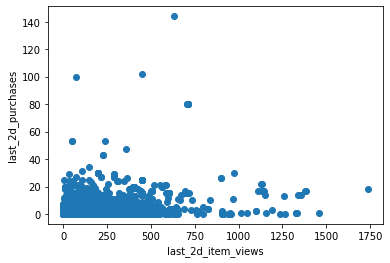

In [7]:
import matplotlib.pyplot as plt
# make scatter plot with last_2d_item_views and last_2d_purchases columns
plt.scatter(df['last_2d_item_views'],df['last_2d_purchases'])
plt.xlabel('last_2d_item_views')
plt.ylabel('last_2d_purchases')


Although it's hard to see, the number of items a seller views prolongs, the number of purchases the seller makes decreases. In other words, the likelihood of a seller purchasing something on the eBay website decreases as the seller searches through more items during the auction period. It's easier to see this downward trend when summing the last_2d_purchases column for each unique last_2d_item_views

Text(0, 0.5, 'sum_last_2d_purchases')

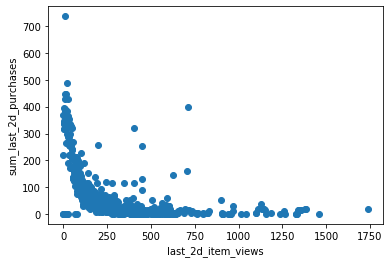

In [8]:
# group by last_2d_item_views by summing the last_2d_purchases
df2 = df.groupby('last_2d_item_views')['last_2d_purchases'].sum()
# make scatter plot with last_2d_item_views and sum_last_2d_purchases columns
plt.scatter(df2.index,df2)
plt.xlabel('last_2d_item_views')
plt.ylabel('sum_last_2d_purchases')


As seen in the plot, there is an exponential curve where as the number of 2d_item_views increases, the sum of last_2d_purchases exponentially decreases. This is an interesting find because at a certain point of item views from the seller, the likelihood of that seller purchasing something is close to none. As there are different types of buyer segments, I created mulitple, exponential curves subsetting the data for each buyer segment.

C:\Users\arnia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in exp
  from ipykernel import kernelapp as app
C:\Users\arnia\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: overflow encountered in multiply
  from ipykernel import kernelapp as app


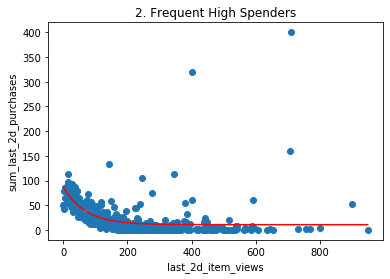

2. Frequent High Spenders R2: 0.2685


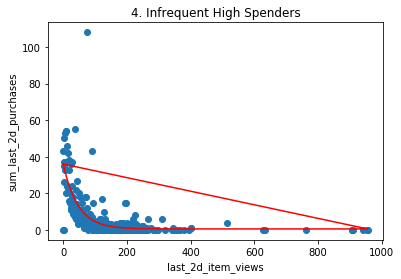

4. Infrequent High Spenders R2: 0.4829


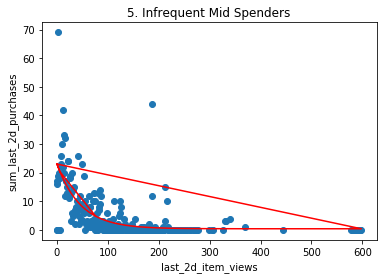

5. Infrequent Mid Spenders R2: 0.4653


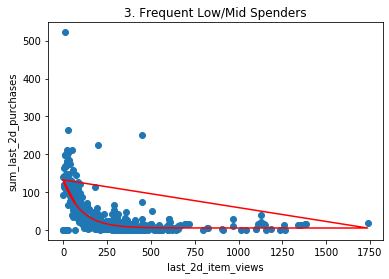

3. Frequent Low/Mid Spenders R2: 0.4557


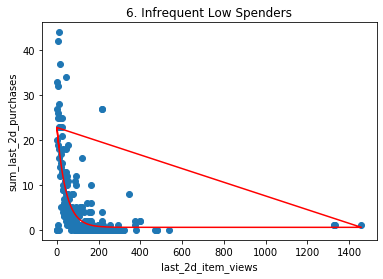

6. Infrequent Low Spenders R2: 0.5015


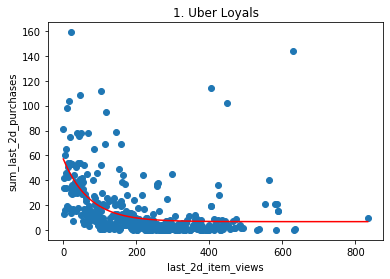

1. Uber Loyals R2: 0.2869


In [9]:
import numpy as np
from scipy.optimize import curve_fit

# go through each buyer segment
for segment in df['buyer_segment'].unique():
    # subset the dataframe that only contains that segment and excluding auction durations with 1 day as we are looking at seller item views/purchases during the 2 days before the auction ended
    df2 = pd.DataFrame(df.loc[(df['buyer_segment']==segment) & (df['auction_duration']!=1),['last_2d_item_views','last_2d_purchases']],columns=['last_2d_item_views','last_2d_purchases'])
    # group the data based on each last_2d_item_views by summing the last_2d_purchases
    data = df2.groupby('last_2d_item_views')['last_2d_purchases'].sum()
    # change data type to int64
    x = np.array(data.index).astype('int64')
    # change data type to int64
    y = np.array(data).astype('int64')
    # get parameters for the exponential curve
    popt, pcov = curve_fit(lambda x,a,b,c: a*np.exp(-b*x)+c, x, y)
    # get fitted data from parameters of exponential curve
    yfit = popt[0]*np.exp(-popt[1]*x)+popt[2]
    # create scatter plot with fitted data
    plt.scatter(x,y)
    plt.plot(x,yfit,'r-')
    plt.xlabel('last_2d_item_views')
    plt.ylabel('sum_last_2d_purchases')
    plt.title(segment)
    plt.show()
    
    # get coefficient of determination to determine how good of a fit the exponentical curve is
    sse = sum((y-yfit)**2)
    sst = sum((y-np.mean(y))**2)
    r2 = np.round(1 - sse/sst,4)
    print(segment + ' R2: ' + str(r2))


Since the goal is to target which sellers receive an email marketing message, it's best to target sellers who are in the closing point of not making a purchase using each unique curve and buyer segment. In other words, sellers would receive the campaign email right at the inflection point of when the curve flattens. So sellers who are close to reaching or have already reached the inflection point where they view a large number items, would not receive the buying marketing message while the sellers who have past that inflection point would receive that message to encourage them in purchasing items.

The coefficient of determination was produced in order to determine how good of a fit the exponential curve is. The frequent high spenders and uber loyals have pretty low goodness of fit values so there may need some work need to be done there whereas the other buyer segments have high enough r2 values that makes it enough to determine the closing point.